**Loading the dataset**

In [66]:
import pandas as pd
df = pd.read_csv('high-school-directory.csv')


In [ ]:
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


**1. Cleaning the dataset**

In [ ]:
import re

def clean_column_name(col_name):
    col_name = col_name.lower()
    col_name = col_name.replace(' ', '_')
    col_name = re.sub(r'[^a-z0-9_]', '', col_name)
    return col_name

df.columns = [clean_column_name(col) for col in df.columns]

print("\nColumn names after cleaning:")
print(df.columns.tolist())


Column names after cleaning:
['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city', 'state_code', 'postcode', 'website', 'total_students', 'campus_name', 'school_type', 'overview_paragraph', 'program_highlights', 'language_classes', 'advancedplacement_courses', 'online_ap_courses', 'online_language_courses', 'extracurricular_activities', 'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2', 'start_time', 'end_time', 'se_services', 'ell_programs', 'school_accessibility_description', 'number_programs', 'priority01', 'priority02', 'priority03', 'priority04', 'priority05', 'priority06', 'priority07', 'priority08', 'priority09', 'pr

**2. Filter the dataset to include only schools located in Brooklyn**

In [ ]:
brooklyn_schools_df = df[df['borough'] == 'Brooklyn'].copy()
display(brooklyn_schools_df.head())

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


**3.a. How many total schools are in Brooklyn?**

In [56]:
total_schools_brooklyn = len(brooklyn_schools_df)
print(f"\nTotal number of schools in Brooklyn: {total_schools_brooklyn}")


Total number of schools in Brooklyn: 121


**3.b. How many offer Grade 9 entry?**

In [67]:
brooklyn_schools_df['grade_span_min'] = pd.to_numeric(
    brooklyn_schools_df['grade_span_min'], errors='coerce'
)
brooklyn_schools_df['grade_span_max'] = pd.to_numeric(
    brooklyn_schools_df['grade_span_max'], errors='coerce'
)

# Filter schools where 9 is within the grade range
schools_grade_9_entry = brooklyn_schools_df[
    (brooklyn_schools_df['grade_span_min'] <= 9) &
    (brooklyn_schools_df['grade_span_max'] >= 9)
]

# Count
num_schools_grade_9_entry = len(schools_grade_9_entry)
print(f"Number of schools in Brooklyn offering Grade 9 entry: {num_schools_grade_9_entry}")

Number of schools in Brooklyn offering Grade 9 entry: 121


**4.a. Count of schools per borough**

In [55]:
schools_per_borough = df.groupby('borough').size().reset_index(name='school_count')
print("\n Count of schools per borough: ")
print(schools_per_borough)


 Count of schools per borough: 
         borough  school_count
0          Bronx           118
1       Brooklyn           121
2      Manhattan           106
3         Queens            80
4  Staten Island            10


**4.b.  Average number of students per borough**

In [47]:
df['total_students'] = pd.to_numeric(
    df['total_students'], errors='coerce'
)

avg_students_per_borough = df.groupby('borough')['total_students'].mean().reset_index(name='avg_students')
print(avg_students_per_borough)

         borough  avg_students
0          Bronx    490.406780
1       Brooklyn    687.578512
2      Manhattan    573.132075
3         Queens    994.312500
4  Staten Island   1847.500000


**4.c. Summary of grade_span_max grouped by borough**

In [62]:
df['grade_span_max'] = pd.to_numeric(
    df['grade_span_max'], errors='coerce'
)

summary_grade_span_max_per_borough = df.groupby('borough')['grade_span_max'].mean().round(2)
print("\n Summary of Grade Span (max) per Borough: ")
print(summary_grade_span_max_per_borough.to_string())


 Summary of Grade Span (max) per Borough: 
borough
Bronx            11.91
Brooklyn         11.93
Manhattan        11.88
Queens           11.82
Staten Island    12.00


**5. Visualization (Bar chart): Number of schools per borough**


<Figure size 800x500 with 0 Axes>

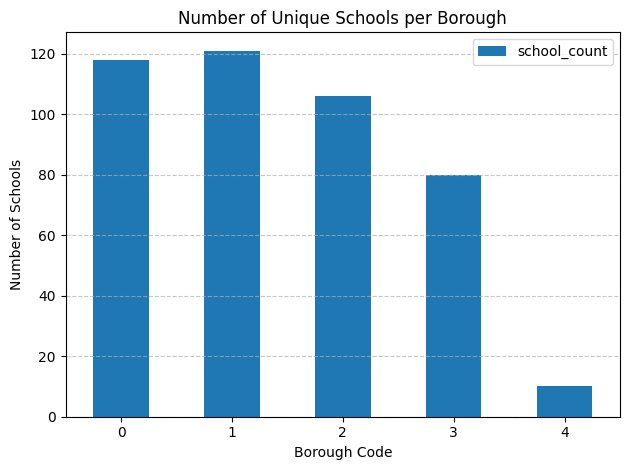

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('high-school-directory.csv')

plt.figure(figsize=(8, 5))
schools_per_borough.plot(kind='bar')

plt.title('Number of Unique Schools per Borough')
plt.xlabel('Borough Code')
plt.ylabel('Number of Schools')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Summary of Key Insights:

**1. Brooklyn has the highest number of high schools in NYC**

With 121 unique schools, Brooklyn tops all boroughs in terms of school count. It is followed by the Bronx (118) and Manhattan (106).


**2. All high schools in Brooklyn offer Grade 9 entry**

Every school in Brooklyn includes Grade 9 within its grade span, making Grade 9 a universally available entry point in the borough.


**3. Staten Island has the fewest schools but highest average student enrollment**

Although Staten Island has only 10 schools, the average student population per school is 1,847, significantly higher than other boroughs. This suggests fewer but much larger schools.